In [1]:
from sklearn.decomposition import PCA
import pandas as pd

In [86]:
# Load dataset
methexpr_df = pd.read_csv('data/processed/ml_with_gene_expr.csv.gz',
compression='gzip',
index_col=0,
low_memory=False)
# Separate feature types
metadata_cols = ['primary site', 'primary histology', 'cosmic_id']
methylation_cols = [col for col in methexpr_df.columns if col.startswith('cg')]
expression_cols = [col for col in methexpr_df.columns if col.startswith('expr_')]
# Extract subsets
X_meth = methexpr_df[methylation_cols] # 1018 x 10000
X_expr = methexpr_df[expression_cols] # 1018 x 4956
metadata = methexpr_df[metadata_cols]

In [3]:
response_df = pd.read_csv('data/processed/ML_dataset_methylation_drug_response.csv.gz',
				 compression='gzip',
				 index_col=0,
				 low_memory=False)


drug_cols = [col for col in response_df.columns if col not in metadata_cols and col not in methylation_cols]

y_all_drugs = response_df[drug_cols]  # 1018 x 265

In [51]:
df = methexpr_df.join(y_all_drugs, how='inner', lsuffix='_caller', rsuffix='_other')
df

,primary site,primary histology,cosmic_id,cg00944421,cg14557185,cg00989853,cg24702147,cg06723863,cg27174108,cg14481208,...,ZG-10,ZL049,ZL109,ZM447439,ZSTK474,Zibotentan,"eEF2K Inhibitor, A-484954",kb NB 142-70,rTRAIL,torin2
697,blood,lymphoblastic_leukemia,906800.0,0.995309,0.999933,0.992589,0.993804,1.000000,0.989910,0.991938,...,NaN,1.389685,-1.238606,-0.364143,-2.428664,4.825729,4.690386,0.684583,-3.045563,NaN
5637,urogenital_system,bladder,687452.0,0.010293,0.009700,0.000000,0.019619,0.001614,0.006393,0.037711,...,NaN,2.053874,0.046212,0.556022,0.239659,5.144572,5.273391,2.519340,-2.889220,NaN
22RV1,urogenital_system,prostate,924100.0,0.005373,0.995386,0.000000,0.005776,0.004595,0.985648,0.009981,...,2.216771,3.456567,0.704177,3.415833,-0.571660,5.886388,5.891054,2.989656,-0.586829,NaN
23132-87,digestive_system,stomach,910924.0,0.000000,0.935833,0.000000,0.008962,0.002041,0.002005,0.026887,...,NaN,3.582629,-0.153728,3.171768,0.052341,5.419213,5.460743,2.988242,-0.347357,NaN
42-MG-BA,nervous_system,glioma,687561.0,0.994996,0.000000,1.000000,1.000000,1.000000,1.000000,0.995498,...,NaN,2.995327,-0.980930,1.339098,2.235509,5.494359,5.566457,3.082294,-1.651262,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAPC,pancreas,pancreas,909904.0,0.009136,0.007066,0.000898,0.015999,0.014864,0.008737,0.019683,...,NaN,5.121817,1.659229,2.946571,2.190982,6.153842,6.538489,3.625790,-1.416428,NaN
YH-13,nervous_system,glioma,909905.0,0.963341,0.005739,0.989838,0.992368,0.993164,0.989321,0.982065,...,0.712498,2.348748,-0.409551,1.514446,0.242131,5.164013,5.539282,1.610461,0.131337,NaN
YKG-1,nervous_system,glioma,687592.0,0.996477,0.007576,0.986879,0.996015,0.993360,0.996321,0.992586,...,NaN,2.297815,-0.086315,1.239723,0.718917,5.048165,5.600037,2.003123,-1.560052,NaN
YT,blood,lymphoid_neoplasm other,946358.0,1.000000,0.998999,0.998225,0.987221,1.000000,0.995139,0.990399,...,NaN,2.737701,0.298806,1.466147,-3.425817,5.165823,5.211461,1.620578,-0.557084,NaN


In [52]:
drug = 'Avagacestat'
y = df[drug].dropna()  # Remove missing values
y

697         3.541041
5637        4.040710
22RV1       3.515197
23132-87    4.091940
42-MG-BA    4.047185
              ...   
YAPC        4.613361
YH-13       4.222055
YKG-1       4.418124
YT          2.715923
ZR-75-30    5.503293
Name: Avagacestat, Length: 896, dtype: float64

In [60]:
feature_cols = methylation_cols + expression_cols
meth_subdf = df[methylation_cols].loc[y.index].dropna(axis=1)
expr_subdf = df[expression_cols].loc[y.index].dropna(axis=1)
methexpr_df = meth_subdf.loc[y.index].dropna(axis=1)  # Ensure no NaNs in features as well
y = y.loc[methexpr_df.index]



In [61]:
y

697         3.541041
5637        4.040710
22RV1       3.515197
23132-87    4.091940
42-MG-BA    4.047185
              ...   
YAPC        4.613361
YH-13       4.222055
YKG-1       4.418124
YT          2.715923
ZR-75-30    5.503293
Name: Avagacestat, Length: 896, dtype: float64

In [39]:

# pca = PCA(n_components=15)
# x_scaler = RobustScaler()
# X_train_scaled = x_scaler.fit_transform(X_train)
# X_train_scaled = pca.fit_transform(X_train_scaled)

# model = Ridge()
# scores = cross_val_score(model, X_scaled, y_train, cv=5, scoring='r2')
# model.fit(X_train_scaled, y_train)
# y_scaler = StandardScaler()
# y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
# y_test = y_scaler.transform(y_test.values.reshape(-1, 1))

In [55]:
y.index

Index(['697', '5637', '22RV1', '23132-87', '42-MG-BA', '451LU', '639-V',
       '647-V', '769-P', '786-0',
       ...
       'WM278', 'WM35', 'WM793B', 'WSU-DLCL2', 'WSU-NHL', 'YAPC', 'YH-13',
       'YKG-1', 'YT', 'ZR-75-30'],
      dtype='object', length=896)

In [62]:
X_expr

,expr_RPS4Y1,expr_KRT19,expr_VIM,expr_S100P,expr_TACSTD2,expr_TGFBI,expr_TM4SF1,expr_SRGN,expr_CAV1,expr_DKK1,...,expr_JAM2,expr_SEPT1,expr_PEX7,expr_RFC5,expr_PENK,expr_ACSL3,expr_E2F3,expr_TM7SF3,expr_TTC14,expr_SFT2D1
697,12.573974,3.261367,12.652829,3.282940,3.221927,4.384763,2.831966,3.272828,3.280339,6.536384,...,5.239927,5.252104,6.627870,8.496907,2.766693,8.469268,7.597450,9.902359,6.926724,9.378083
5637,10.486427,12.482335,11.724988,6.528566,10.700406,10.774644,9.799508,2.996163,11.657541,7.964236,...,3.332692,3.060993,7.982724,7.489100,2.894963,9.886996,10.607952,8.731725,5.143855,9.814031
22RV1,12.005096,10.250132,7.409285,13.480581,2.955979,3.270763,2.932613,3.346357,3.164307,6.325388,...,3.137277,3.234577,8.631361,7.250483,2.815874,9.578729,5.241522,9.666908,7.436008,6.994852
23132-87,12.037311,12.489467,3.466505,13.729743,9.140491,4.427674,3.648807,3.222594,3.316925,2.873951,...,3.104617,3.122160,9.548485,6.217373,2.824991,9.510297,5.226579,10.328542,6.025421,10.055381
42-MG-BA,3.859759,3.541994,13.007622,3.736833,2.866319,12.388084,5.350458,4.653122,10.937337,2.916526,...,6.497410,3.017686,7.274507,6.376033,3.037293,10.376590,6.587491,8.269302,6.610513,9.787585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAPC,11.706907,12.399600,8.310473,12.307949,10.593732,10.699073,11.695530,2.972310,11.204241,10.923055,...,3.160740,3.239356,7.852246,7.753827,2.996260,10.103385,6.098732,9.578503,6.843696,10.556830
YH-13,3.079912,8.198396,12.835556,3.766602,3.082798,12.503706,11.388092,8.891957,11.983793,4.460423,...,4.127248,3.171536,7.192872,7.492028,2.968564,8.663977,6.349145,8.770447,6.736737,9.609865
YKG-1,3.310185,4.181137,12.831082,8.092991,2.897813,11.927361,10.919837,3.192500,9.626697,12.615605,...,3.164598,3.154400,7.742972,6.738969,2.757865,8.894755,6.836061,9.024287,7.312585,9.803229
YT,11.368446,3.803154,12.323882,3.287796,3.165175,3.990835,3.015546,12.030208,3.125977,2.729643,...,2.906149,5.274671,7.092308,7.250872,3.009202,9.053290,6.760212,10.681652,8.856739,9.908252


In [42]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

X_meth = methexpr_df[methylation_cols].loc[y.index]
X_expr = methexpr_df[expression_cols].loc[y.index]

y = (y - y.mean()) / y.std(ddof=0)

methx_scaler = StandardScaler()
exprx_scaler = StandardScaler()

X_meth_scaled = methx_scaler.fit_transform(X_meth)
X_expr_scaled = exprx_scaler.fit_transform(X_expr)

corr_meth = X_meth_scaled.T @ y / (len(y) - 1)
corr_expr = X_expr_scaled.T @ y / (len(y) - 1)

corr_meth = pd.Series(corr_meth, index=methylation_cols)
corr_expr = pd.Series(corr_expr, index=expression_cols)

top_meth = corr_meth.abs().sort_values(ascending=False).head(50)
top_expr = corr_expr.abs().sort_values(ascending=False).head(50)

top_meth.head(), top_expr.head()

(cg24603464    0.262332
 cg08564661    0.240311
 cg08183141    0.233064
 cg02501827    0.226775
 cg23919479    0.226578
 dtype: float64,
 expr_TRAT1      0.266460
 expr_GNA11      0.265240
 expr_SEPT6      0.252849
 expr_PTPRCAP    0.245800
 expr_GIMAP2     0.244140
 dtype: float64)

In [43]:
corr_expr

expr_RPS4Y1    -0.052846
expr_KRT19      0.155185
expr_VIM       -0.067668
expr_S100P      0.069980
expr_TACSTD2    0.049917
                  ...   
expr_ACSL3      0.064789
expr_E2F3      -0.079305
expr_TM7SF3     0.020857
expr_TTC14     -0.003687
expr_SFT2D1    -0.035992
Length: 5000, dtype: float64

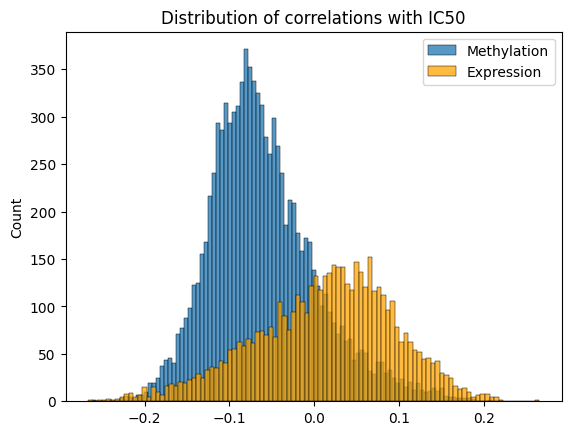

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(corr_meth, bins=100, label='Methylation')
sns.histplot(corr_expr, bins=100, color='orange', label='Expression')
plt.legend()
plt.title("Distribution of correlations with IC50")
plt.show()

In [45]:
print(len(set(X_subset.columns) & (set(methylation_cols))))
X_subset.columns

10000


Index(['cg00944421', 'cg14557185', 'cg00989853', 'cg24702147', 'cg06723863',
       'cg27174108', 'cg14481208', 'cg24361265', 'cg00699993', 'cg15043384',
       ...
       'expr_JAM2', 'expr_SEPT1', 'expr_PEX7', 'expr_RFC5', 'expr_PENK',
       'expr_ACSL3', 'expr_E2F3', 'expr_TM7SF3', 'expr_TTC14', 'expr_SFT2D1'],
      dtype='object', length=15000)

In [49]:
X_subset[methylation_cols]

,cg00944421,cg14557185,cg00989853,cg24702147,cg06723863,cg27174108,cg14481208,cg24361265,cg00699993,cg15043384,...,cg16628641,cg25747192,cg25291653,cg24739382,cg20792735,cg04408104,cg12626589,cg01824410,cg17484699,cg27392850
697,0.995309,0.999933,0.992589,0.993804,1.000000,0.989910,0.991938,0.005463,0.980490,1.000000,...,0.995574,0.866022,0.951988,0.954892,0.614631,0.029706,0.918360,0.979984,0.901591,0.858978
5637,0.010293,0.009700,0.000000,0.019619,0.001614,0.006393,0.037711,0.587964,0.028663,0.003972,...,0.823611,0.571073,0.042347,0.037317,0.041641,0.040317,0.090533,0.016367,0.142429,0.362212
22RV1,0.005373,0.995386,0.000000,0.005776,0.004595,0.985648,0.009981,0.000000,0.018580,1.000000,...,0.485036,0.863765,0.424582,0.182082,0.008633,0.607748,0.759241,0.000000,0.065103,0.022478
23132-87,0.000000,0.935833,0.000000,0.008962,0.002041,0.002005,0.026887,0.010502,0.989269,0.947546,...,0.807723,0.063676,0.491103,0.692169,0.604704,0.208816,0.457543,0.139607,0.348603,0.545805
647-V,0.015459,0.006309,0.000000,0.014251,0.009467,0.012939,0.025986,0.005884,0.979913,0.009672,...,0.968401,0.889910,0.654405,0.425109,0.030969,0.047019,0.090405,0.017609,0.075002,0.912066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U-266,0.993372,0.997721,0.012769,1.000000,0.992785,0.996897,0.981568,0.990658,0.867933,0.993955,...,0.992085,0.876771,0.032962,0.123646,0.029509,0.930540,0.279984,0.096002,0.052022,0.341714
VCAP,0.007966,0.990491,0.000000,0.435159,0.005023,0.984325,0.035754,0.979028,0.035779,0.983275,...,0.361392,0.895673,0.044799,0.920193,0.075513,0.049297,0.878010,0.662948,0.058822,0.048762
WIL2-NS,0.994282,0.993255,0.988372,0.989364,0.995505,0.992980,0.638209,0.985829,0.987411,0.997167,...,0.996762,0.061289,0.944013,0.882323,0.969004,0.890536,0.862111,0.964304,0.800975,0.929417
WSU-DLCL2,0.554563,0.999141,1.000000,0.989226,0.016506,0.992446,0.016952,0.000000,0.986051,0.986304,...,0.996535,0.042842,0.965149,0.010958,0.916337,0.077181,0.740073,0.982634,0.937507,0.019201


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Heatmap

#### original code

In [82]:
from sklearn.preprocessing import StandardScaler


In [83]:
X_meth_scaled.mean(axis = 0)

array([ 8.72318091e-17, -3.17206578e-17, -2.87468462e-17, ...,
        7.53365624e-17,  1.78428700e-17,  5.15460690e-17], shape=(10000,))

In [84]:
corr_meth = corr_meth[~np.isnan(corr_meth)]

In [87]:
X_expr = methexpr_df[expression_cols].loc[y.index].dropna(axis=1)

In [88]:
X_expr_mean = np.nanmean(X_expr_scaled, axis = 0)

In [89]:
X_meth_mean = np.nanmean(X_meth_scaled, axis = 0)

In [90]:
X_expr_mean.min(), X_expr_mean.max()

(np.float64(-1.966680786478849e-15), np.float64(2.827103630563345e-15))

In [91]:
X_meth_mean.min(), X_meth_mean.max()

(np.float64(-5.333035600431556e-16), np.float64(4.639146210040833e-16))

<Axes: >

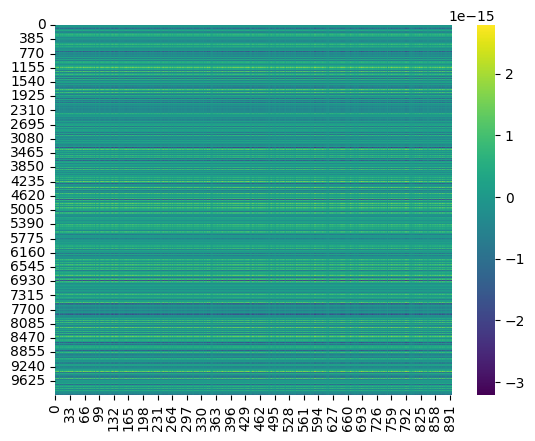

In [ ]:
ax = sns.heatmap(np.outer(X_meth_mean, y), cmap='viridis')
ax.set_xlabel("IC50")
ax.set_ylabel("Methylation mean")
plt.title("Methylation vs IC50 outer product heatmap")
plt.show()

<Axes: >

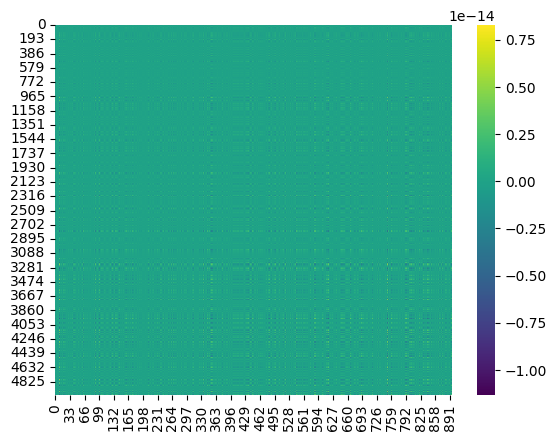

In [ ]:
ax =sns.heatmap(np.outer(X_expr_mean, y), cmap='viridis')
ax.set_xlabel("IC50")
ax.set_ylabel("Expression mean")
plt.title("Expression vs IC50 outer product heatmap")
plt.show()

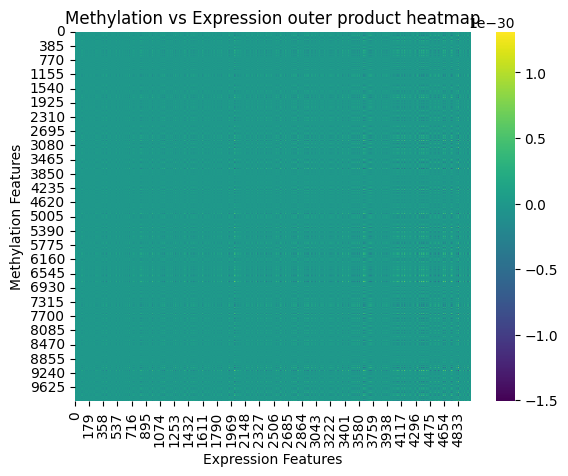

In [ ]:
ax = sns.heatmap(np.outer(X_meth_mean, X_expr_mean), cmap='viridis',)
ax.set_xlabel("Expression mean")
ax.set_ylabel("Methylation mean")
plt.title("Methylation vs Expression outer product heatmap")

plt.show()

### Feature by Feature Comparison

methylation colums: 9674 features 

In [63]:
meth_subdf.shape

(896, 9674)

expressions columns: 5000

In [64]:
expr_subdf.shape

(896, 5000)

Compute correlation feature wise for each

In [73]:
meth_corr = meth_subdf.apply(lambda x: x.corr(y), axis=0)

In [75]:
meth_corr.to_frame().T

,cg00944421,cg14557185,cg00989853,cg24702147,cg06723863,cg27174108,cg14481208,cg24361265,cg00699993,cg15043384,...,cg16628641,cg25747192,cg25291653,cg24739382,cg20792735,cg04408104,cg12626589,cg01824410,cg17484699,cg27392850
0,-0.087246,-0.123238,-0.138512,-0.066093,-0.076273,-0.123181,-0.076196,-0.075391,-0.083897,-0.123603,...,-0.110753,0.085153,-0.102506,0.058743,-0.066218,-0.0548,0.000614,-0.094554,-0.144778,-0.015154


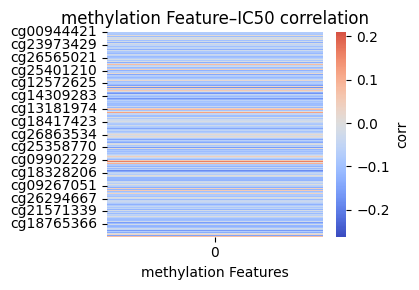

In [78]:
corr_df = meth_corr.to_frame()   # shape (1, k)
plt.figure(figsize=(0.22*len(corr_df.columns) + 4, 3))
ax = sns.heatmap(corr_df, cmap='coolwarm', center=0, cbar_kws={'label':'corr'})
ax.set_xlabel("methylation Features")
ax.set_ylabel("")
ax.set_title("methylation Feature–IC50 correlation")
plt.tight_layout()
plt.show()

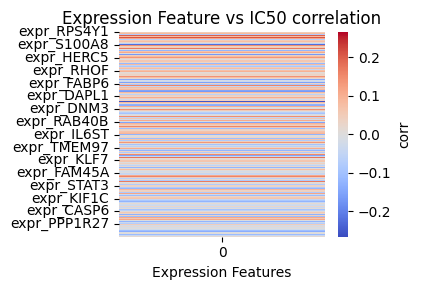

In [80]:
expression_corr = expr_subdf.apply(lambda x: x.corr(y), axis=0)

corr_df = expression_corr.to_frame()   # shape (1, k)
plt.figure(figsize=(0.22*len(corr_df.columns) + 4, 3))
ax = sns.heatmap(corr_df, cmap='coolwarm', center=0, cbar_kws={'label':'corr'})
ax.set_xlabel("Expression Features")
ax.set_ylabel("")
ax.set_title("Expression Feature vs IC50 correlation")
plt.tight_layout()
plt.show()